In [1]:
%load_ext watermark
%watermark

2017-11-07T20:57:58+01:00

CPython 3.6.1
IPython 5.3.0

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.10.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


### Cargamos datos

In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
datos = datasets.load_boston()

In [18]:
boston = pd.DataFrame(datos.data, columns=datos.feature_names)
boston["objetivo"] = datos.target

In [19]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,objetivo
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**INCISO**

Hasta ahora hemos usado la magia de jupyter notebook `?` y `??` para ver cual es la documentacion de una clase o función. Jupyter lo unico que hace es leer el docstring de dichos objetos. El docstring de un objeto en python es el string delimitado por `"""` que se define justo después del nombre de dicho objeto, y tiene como objetivo el documentar el uso del mismo.

Por ejemplo, si creamos la clase `ClaseTest` con un docstring:

In [29]:
class ClaseTest():
    """Éste es el docstring"""

podemos usar la magia de jupyter para que nos imprima el docstring.

In [26]:
ClaseTest?

Alternativamente podemos imprimir directamente el atributo `__doc__` de la clase

In [30]:
print(ClaseTest.__doc__)

Éste es el docstring


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

En primer lugar vamos a evaluar los algoritmos que conocemos hasta ahora y compararlos con los distintos algoritmos de ensamblado.

In [32]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmse_cv(estimador, X, y):
    preds = estimador.predict(X)
    return rmse(y, preds)

In [33]:
resultados = {}

In [34]:
from sklearn.tree import DecisionTreeRegressor

estimador_arbol = DecisionTreeRegressor()

error_cv = cross_val_score(estimador_arbol, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["arbol"] = error_cv



from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimador_elnet = ElasticNet()

resultados["elasticnet"] = cross_val_score(estimador_elnet, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()


estimador_lasso = Lasso()
estimador_ridge = Ridge()


resultados["lasso"] = cross_val_score(estimador_lasso, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["ridge"] = cross_val_score(estimador_ridge, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados

{'arbol': 5.9465687016858997,
 'elasticnet': 5.2610502191314854,
 'lasso': 5.4649203446998555,
 'ridge': 5.0996452049612477}

### Bagging

Los algoritmos de Bagging (Bootstrap aggregating) funcionan entrenando varios estimadores base y cambiando los datos de entrenamiento para cada uno. En sklearn los algoritmos de ensamblado de modelos se encuentran en el submódulo `sklearn.ensemble`. En cuanto a Bagging, sklearn tiene una versión para problemas de regresión (`BaggingRegressor`) y otra para problemas de clasificación (`BaggingClassifier`).

In [35]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier

In [36]:
print(BaggingRegressor.__doc__)

A Bagging regressor.

    A Bagging regressor is an ensemble meta-estimator that fits base
    regressors each on random subsets of the original dataset and then
    aggregate their individual predictions (either by voting or by averaging)
    to form a final prediction. Such a meta-estimator can typically be used as
    a way to reduce the variance of a black-box estimator (e.g., a decision
    tree), by introducing randomization into its construction procedure and
    then making an ensemble out of it.

    This algorithm encompasses several works from the literature. When random
    subsets of the dataset are drawn as random subsets of the samples, then
    this algorithm is known as Pasting [1]_. If samples are drawn with
    replacement, then the method is known as Bagging [2]_. When random subsets
    of the dataset are drawn as random subsets of the features, then the method
    is known as Random Subspaces [3]_. Finally, when base estimators are built
    on subsets of both sam

In [51]:
estimador_bagging_10 = BaggingRegressor(n_estimators=10)
error_cv = cross_val_score(estimador_bagging_10, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["bagging_arbol_10"] = error_cv
error_cv

4.4643651472573547

Aumentar el número de estimadores base es una forma limitada pero sencilla de mejorar el funcionamiento del modelo

In [38]:
estimador_bagging_100 = BaggingRegressor(n_estimators=100)
error_cv = cross_val_score(estimador_bagging_100, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["bagging_arbol_100"] = error_cv
error_cv

4.2092328950958855

`BaggingRegressor` utiliza árboles de decisión como estimador base por defecto, sin embargo podemos utilizar uno distinto mediante el parámetro `base_estimator`.

In [43]:
estimador_bagging_elnet = BaggingRegressor(n_estimators=100, base_estimator=ElasticNet())
error_cv = cross_val_score(estimador_bagging_elnet, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["bagging_elnet"] = error_cv
error_cv

5.2666637956257238

En su momento vimos que existe un tipo de arbol de decision completamente aleatorio (Extremely Randomized Trees) que deciden la particion en cada nodo al azar. Vemos que al agrupar muchos de estos estimadores que son débiles (aun que mejores que tirar una moneda al azar, ya que un árbol de decision aleatorio aun asi aprende a separar los elementos), la varianza general se reduce ya que la que aporta un arbol se complementa con la del de al lado.

In [40]:
from sklearn.tree import ExtraTreeRegressor

estimador_bagging_elnet = BaggingRegressor(n_estimators=100, base_estimator=ExtraTreeRegressor())
error_cv = cross_val_score(estimador_bagging_elnet, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["bagging_extra_arbol"] = error_cv
error_cv

3.9164564364820924

### Boosting

Los algoritmos de boosting intentan mejorar los estimadores base asignando pesos en funcion de su funcionamiento individual. El algoritmo clásico de boosting es `AdaBoost`, que se encuentra en sklearn como `AdaBoostRegressor` y `AdaBoostClassifier`.

In [41]:
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier

In [42]:
print(AdaBoostRegressor.__doc__)

An AdaBoost regressor.

    An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
    regressor on the original dataset and then fits additional copies of the
    regressor on the same dataset but where the weights of instances are
    adjusted according to the error of the current prediction. As such,
    subsequent regressors focus more on difficult cases.

    This class implements the algorithm known as AdaBoost.R2 [2].

    Read more in the :ref:`User Guide <adaboost>`.

    Parameters
    ----------
    base_estimator : object, optional (default=DecisionTreeRegressor)
        The base estimator from which the boosted ensemble is built.
        Support for sample weighting is required.

    n_estimators : integer, optional (default=50)
        The maximum number of estimators at which boosting is terminated.
        In case of perfect fit, the learning procedure is stopped early.

    learning_rate : float, optional (default=1.)
        Learning rate shrinks the c

In [52]:
estimador_adaboost = AdaBoostRegressor(n_estimators=100)

error_cv = cross_val_score(estimador_adaboost, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["adaboost_100"] = error_cv
error_cv

4.5006246116617605

### Gradient Boosting (GBRT)

Otro algoritmo de Boosting es Gradient Boosting que a cada iteración usa el algoritmo de Descenso de Gradiente (que veremos en el futuro) para a cada iteración , entrenar un estimador nuevo que minimiza la función de error (*loss function*) del modelo.

Scikit-learn implementa el algoritmo de (Gradient Boosted Regression Trees), que usa árboles de decisión como estimadores base, en [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) y [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Gradient Boosting puede usar cualquier funcion de error siempre que sea diferenciable.

In [53]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [54]:
print(GradientBoostingRegressor.__doc__)

Gradient Boosting for regression.

    GB builds an additive model in a forward stage-wise fashion;
    it allows for the optimization of arbitrary differentiable loss functions.
    In each stage a regression tree is fit on the negative gradient of the
    given loss function.

    Read more in the :ref:`User Guide <gradient_boosting>`.

    Parameters
    ----------
    loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
        loss function to be optimized. 'ls' refers to least squares
        regression. 'lad' (least absolute deviation) is a highly robust
        loss function solely based on order information of the input
        variables. 'huber' is a combination of the two. 'quantile'
        allows quantile regression (use `alpha` to specify the quantile).

    learning_rate : float, optional (default=0.1)
        learning rate shrinks the contribution of each tree by `learning_rate`.
        There is a trade-off between learning_rate and n_estimators.

    n_e

In [55]:
estimador_gradientboost = GradientBoostingRegressor(n_estimators=100, loss='ls')

error_cv = cross_val_score(estimador_gradientboost, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["gradientboost_100"] = error_cv
error_cv

3.9206439598661236

Como cualquier estimador basado en árboles, `GradientBoostRegressor` nos permite ver la importancia de las variables en el modelo final.

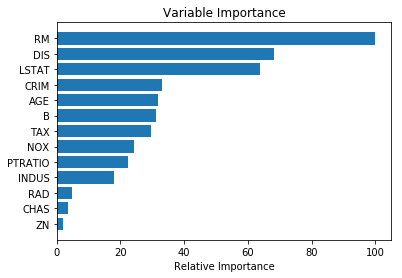

In [56]:
estimador_gradientboost.fit(boston[datos.feature_names], boston.objetivo)

importancia_variables = estimador_gradientboost.feature_importances_
importancia_variables = 100.0 * (importancia_variables / importancia_variables.max())
sorted_idx = np.argsort(importancia_variables)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importancia_variables[sorted_idx], align='center')
plt.yticks(pos, datos.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Bosques Aleatorios (Random Forests)

El algoritmo de Bosques Aleatorios funciona mediante la creación de árboles de decision entrenados en un subgrupo aleatorio de variables.

In [57]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [58]:
print(RandomForestRegressor.__doc__)

A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and use averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is always the same as the original
    input sample size but the samples are drawn with replacement if
    `bootstrap=True` (default).

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : integer, optional (default=10)
        The number of trees in the forest.

    criterion : string, optional (default="mse")
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion, and "mae" for the mean
        absolute error.

        .. versionadded:: 0.18
           Mean Absolute Error (MAE) criterion.

    max_features : int, float, string or None, op

La implementación de scikit-learn de RandomForest hace que cada árbol se entrene en base a un dataset del mismo tamaño que el original (con reemplazo si se usa la opción `bootstrap=True`).

En cuanto al criterio para evaluar la calidad de la separación de un node de cada árbol base, para la implementación de Regresion, `RandomForestRegressor` usa el error medio cuadrático `mse` por defecto.

In [59]:
estimador_randomforest = RandomForestRegressor(n_estimators=100)

error_cv = cross_val_score(estimador_randomforest, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["randomforest_100"] = error_cv
error_cv

4.1939664948606872

In [60]:
resultados

{'adaboost_100': 4.5006246116617605,
 'arbol': 5.9465687016858997,
 'bagging_arbol_10': 4.4643651472573547,
 'bagging_arbol_100': 4.2092328950958855,
 'bagging_elnet': 5.2666637956257238,
 'bagging_extra_arbol': 3.9164564364820924,
 'elasticnet': 5.2610502191314854,
 'gradientboost_100': 3.9206439598661236,
 'lasso': 5.4649203446998555,
 'randomforest_100': 4.1939664948606872,
 'ridge': 5.0996452049612477}

### XGBoost

XGBoost (eXtreme Gradient Boosting) es un algoritmo de boosting relativamente nuevo que tiene bastante acogida. Es una implementación de Gradient Boosted Trees pero enfocado a datasets grandes.

Al ser muy nuevo (el proyecto se creó en 2014 y el paper se publicó en 2016, [éste es el paper](https://arxiv.org/abs/1603.02754)) no está implementado en scikit-learn, sin embargo existe en el paquete [xgboost](http://xgboost.readthedocs.io/en/latest/python/python_intro.html), que proporciona estimadores en base a dicho algoritmo que son compatibles con sklearn.

Podemos instalar `xgboost` de conda-forge

In [61]:
!conda install -y -c conda-forge xgboost

Fetching package metadata .........^C
Traceback (most recent call last):
  File "/home/manuel/anaconda3/envs/data/bin/conda", line 11, in <module>
    sys.exit(main())
  File "/home/manuel/anaconda3/lib/python3.6/site-packages/conda/cli/main.py", line 182, in main
    return conda_exception_handler(_main, *args)
  File "/home/manuel/anaconda3/lib/python3.6/site-packages/conda/exceptions.py", line 640, in conda_exception_handler
    return_value = func(*args, **kwargs)
  File "/home/manuel/anaconda3/lib/python3.6/site-packages/conda/cli/main.py", line 140, in _main
    exit_code = args.func(args, p)
  File "/home/manuel/anaconda3/lib/python3.6/site-packages/conda/cli/main_install.py", line 80, in execute
    install(args, parser, 'install')
  File "/home/manuel/anaconda3/lib/python3.6/site-packages/conda/cli/install.py", line 231, in install
    unknown=index_args['unknown'], prefix=prefix)
  File "/home/manuel/anaconda3/lib/python3.6/site-packages/conda/core/index.py", line 101, in get

In [62]:
from xgboost import XGBRegressor

/home/manuel/anaconda3/envs/data/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
print(XGBRegressor.__doc__)

Implementation of the scikit-learn API for XGBoost regression.
        Parameters
    ----------
    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    n_estimators : int
        Number of boosted trees to fit.
    silent : boolean
        Whether to print messages while running boosting.
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    nthread : int
        Number of parallel threads used to run xgboost.
    gamma : float
        Minimum loss reduction required to make a further partition on a leaf node of the tree.
    min_child_weight : int
        Minimum sum of instance weight(hessian) needed in a child.
    max_delta_step : int
        Maximum delta step we allow each tree's weight estimation to be.
    subsample : float
        Subsample ratio of the training inst

In [64]:
estimador_xgboost = XGBRegressor(n_estimators=100)

error_cv = cross_val_score(estimador_xgboost, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["xgboost_100"] = error_cv
error_cv

3.9976500479974781

In [65]:
from xgboost import plot_importance, to_graphviz
estimador_xgboost.fit(boston[datos.feature_names], boston.objetivo)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

Cuando tenemos un modelo entrenado, podemos ver la importancia de las variables en partir los árboles mediante el método `plot_importance`

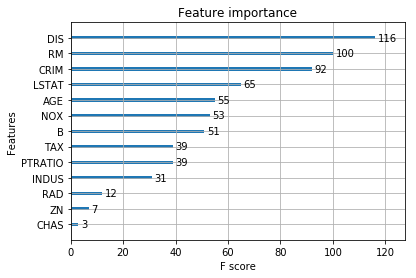

In [66]:
plot_importance(estimador_xgboost)

El método `to_graphviz` imprime un árbol en concreto (pasandole el parámetro `rankdir='LR'` lo imprime en horizontal).

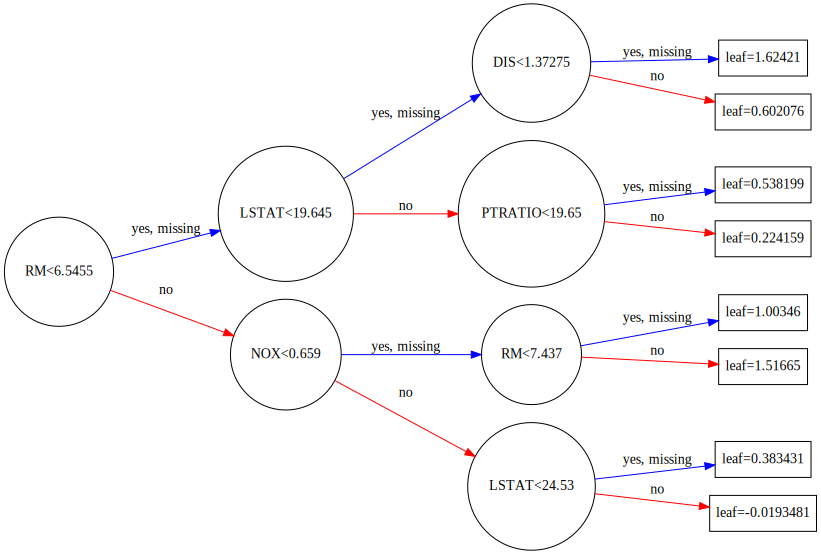

In [68]:
to_graphviz(estimador_xgboost, num_trees=11, rankdir='LR')

Como vemos, el output de un árbol no está en la misma escala que las predicciones (la variable objetivo tiene el rango 5-50), esto es así por que en el algoritmo XGBoost cada árbol se basa en el output del árbol anterior, intentando corregir el error producido por el mismo.

### Stacking

El algoritmo de stacking simplemente usa el output (generalmente en terminos de probabilidades para casos de clasificacion o de las predicciones en casos de regresión) de múltiples modelos como input para un nuevo *metamodelo*.

scikit learn no tiene un estimador de stacking por defecto, sin embargo, podemos usar el  estimador de stacking (`StackingRegressor`) de [mlxtend](https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/), una librería que amplia las funcionalidades de `sklearn`

Podemos instalar mlxtend asi:

In [ ]:
!conda install -y -c conda-forge mlxtend

In [69]:
from mlxtend.regressor import StackingRegressor

In [70]:
print(StackingRegressor.__doc__)

A Stacking regressor for scikit-learn estimators for regression.

    Parameters
    ----------
    regressors : array-like, shape = [n_regressors]
        A list of regressors.
        Invoking the `fit` method on the `StackingRegressor` will fit clones
        of those original regressors that will
        be stored in the class attribute
        `self.regr_`.
    meta_regressor : object
        The meta-regressor to be fitted on the ensemble of
        regressors
    verbose : int, optional (default=0)
        Controls the verbosity of the building process.
        - `verbose=0` (default): Prints nothing
        - `verbose=1`: Prints the number & name of the regressor being fitted
        - `verbose=2`: Prints info about the parameters of the
                       regressor being fitted
        - `verbose>2`: Changes `verbose` param of the underlying regressor to
           self.verbose - 2

    Attributes
    ----------
    regr_ : list, shape=[n_regressors]
        Fitted regress

Por ejemplo, podemos usar los estimadores ensamblados que hemos creado en este notebook para crear un nuevo estimador. Dicho estimador no tiene garantizado un funcionamiento mejor que el mejor de los estimadores que usa como input.

In [71]:
estimador_stacking = StackingRegressor(
    regressors=[
        BaggingRegressor(n_estimators=100),
        AdaBoostRegressor(n_estimators=100),
        GradientBoostingRegressor(n_estimators=100),
        RandomForestRegressor(n_estimators=100)
    ], 
    meta_regressor=XGBRegressor(n_estimators=100))


error_cv = cross_val_score(estimador_stacking, X=boston[datos.feature_names], y=boston["objetivo"], 
                scoring=rmse_cv, cv=10).mean()

resultados["stacking"] = error_cv

error_cv

4.0863402204208503

In [72]:
resultados

{'adaboost_100': 4.5006246116617605,
 'arbol': 5.9465687016858997,
 'bagging_arbol_10': 4.4643651472573547,
 'bagging_arbol_100': 4.2092328950958855,
 'bagging_elnet': 5.2666637956257238,
 'bagging_extra_arbol': 3.9164564364820924,
 'elasticnet': 5.2610502191314854,
 'gradientboost_100': 3.9206439598661236,
 'lasso': 5.4649203446998555,
 'randomforest_100': 4.1939664948606872,
 'ridge': 5.0996452049612477,
 'stacking': 4.0863402204208503,
 'xgboost_100': 3.9976500479974781}